# Linear Regression 1D: Training and Validation Data

## Tabel and Contents

1. Make Some Data
2. Create a Linear Regression object, DataLoader, Criterion function
3. Different learing rates
4. Train different modules for different Hyperparameters
5. View Results

In [1]:
# import libraries

from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from torch.utils.data import Dataset, DataLoader

## 1. Make Some Data

In [2]:
# Create dataset

class Data(Dataset):
    
    def __init__(self, train= True):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.f = 1 * self.x + 1
        self.y = self.f + 0.1 * torch.randn(self.x.size())
        self.len = self.x.shape[0]
        
        # outliers
        if train == True:
            self.y[0] = 0
            self.y[50:55] = 20
        else:
            pass
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [3]:
# Create training dataset and vaildation dataset

train_data = Data()
val_data = Data(train = False)

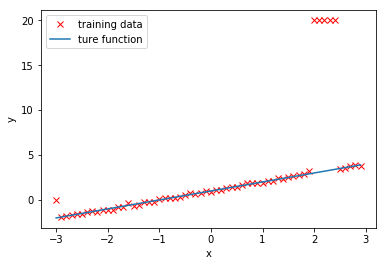

In [4]:
# Plot the data

plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr', label='training data')
plt.plot(train_data.x.numpy(), train_data.f.numpy(), label='ture function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## 2. Create a Linear Regression object, DataLoader, Criterion Function

In [5]:
# Create a linear regression class

class linear_regression(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [6]:
# Create MSEloss function and Data Loader

criterion = nn.MSELoss()
trainloader = DataLoader(dataset=train_data, batch_size=1)

## 3. Different learning rates

In [7]:
# Create learning rates list, the error list, model list

learning_rates = [0.00001, 0.0001, 0.01, 0.1]

train_error = torch.zeros(len(learning_rates))
validation_error = torch.zeros(len(learning_rates))

models = []

## 4. Training the model for different Hyperpameters

In [8]:
# Define train function

def train_model_with_lr(iter, lr_list):
    
    # iterate the different learning rate
    for i, lr in enumerate(lr_list):
        
        model = linear_regression(1,1)
        optimizer = optim.SGD(model.parameters(), lr=lr)
        
        # Loop
        for epoch in range(iter):
            
            # train the parameters w,b
            for x, y in trainloader:
                yhat = model(x)
                loss = criterion(yhat, y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                
        # train the data
        Yhat = model(train_data.x)
        train_loss = criterion(Yhat, train_data.y)
        train_error[i] = train_loss.item()
        
        # validation data
        Yhat = model(val_data.x)
        valid_loss = criterion(Yhat, val_data.y)
        validation_error[i] = valid_loss.item()
        
        # save model
        models.append(model)
    
train_model_with_lr(10, learning_rates)

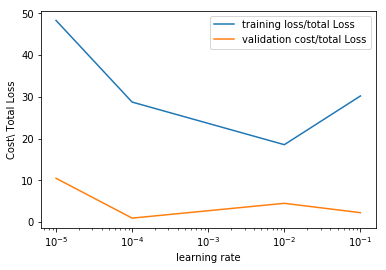

In [9]:
# Plot the training loss and validation loss

plt.semilogx(np.array(learning_rates), train_error.numpy(), label = 'training loss/total Loss')
plt.semilogx(np.array(learning_rates), validation_error.numpy(), label = 'validation cost/total Loss')
plt.ylabel('Cost\ Total Loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()

i [[2.1721025]
 [2.0940557]
 [2.0160086]]
i [[-0.5437399 ]
 [-0.5007286 ]
 [-0.45771718]]
i [[-4.1317225]
 [-3.9253275]
 [-3.7189324]]
i [[0.8868491 ]
 [0.90073633]
 [0.9146235 ]]


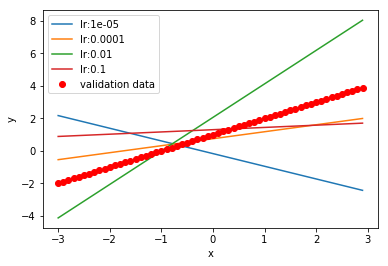

In [10]:
# Plot the predictions

i = 0
for model, learning_rate in zip(models, learning_rates):
    yhat = model(val_data.x)
    plt.plot(val_data.x.numpy(), yhat.detach().numpy(), label = 'lr:' + str(learning_rate))
    print('i', yhat.detach().numpy()[0:3])
plt.plot(val_data.x.numpy(), val_data.f.numpy(), 'or', label = 'validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [11]:
t = [11, 22, 33]
s = ['a', 'b', 'c']
for num, string in zip(t, ):
    print(i)
    print(num)

0
11
1
22
2
33
